# Introduction

Recent shifts in seasonal patterns indicate towards a more fitful change in climate owing to man-made issues. This project aims to analyse FAOSTAT Temperature change data to visualise and predict the changes in said patterns.


<!-- blank line -->
   ![Alt Text](https://images.unsplash.com/photo-1461880234904-751a2f54f1c7?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1050&q=80)
  
**We'll primarily make use of the libraries below to attain our task:**
    
   **Pandas**
    
   **Matplotlib**
    
   **Seaborn**
    
   **Numpy**
    
   **sklearn** 
   
   **Pipeline** 
   
<!-- blank line -->
## About the data 

The **FAOSTAT Temperature Change domain** disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period **1961–2019**. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period **1951–1980**. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS).


## Import required libraries

In [82]:
#import libraries
import pandas as pd 
import datetime
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn import metrics


%matplotlib inline

## Loading the data & prelimnary analysis 

In [83]:
#ignore warninngs and read the data
warnings.filterwarnings('ignore')
df = pd.read_csv("Temp_change.csv",encoding='latin-1')
df.head()

df = df.rename(columns = {"Area":"Country"})
display(df.sample(3))
print('Data Shape: ', df.shape)

,Area Code,Country,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
3558,101,Indonesia,7012,December,7271,Temperature change,°C,0.191,-0.066,0.221,...,0.063,0.416,0.570,0.708,0.572,1.448,0.989,0.563,1.124,1.284
450,11,Austria,7005,May,7271,Temperature change,°C,-1.180,-1.586,-0.047,...,0.531,2.037,2.207,0.509,0.588,1.650,1.104,2.265,4.056,-1.269
6630,186,Serbia and Montenegro,7001,January,7271,Temperature change,°C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Shape:  (9656, 66)


## Cleaning
Factors which are beyond our control contribute to make irregularities in the aquired data. The heatmap below **highlights NaN/null** values present in our dataset. 


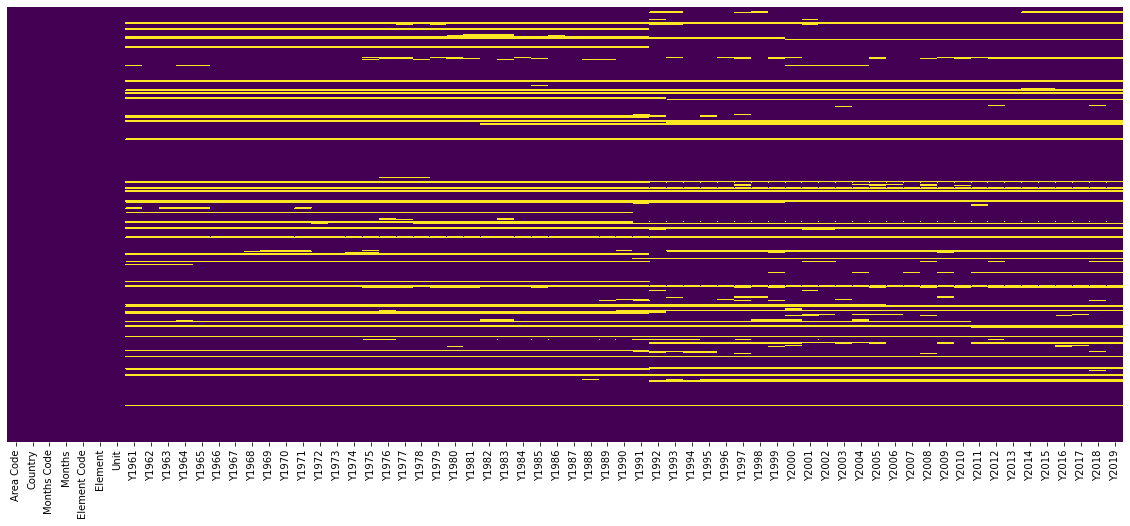

In [84]:
#Display empty data points
df.isnull().sum()
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Dropping the rows containing these, we move ahead. Additionally, we also drop the month-groupings along with other unnecessary columns.


In [85]:
df.dropna()
df = df.drop(columns = ['Area Code',"Months Code","Element Code",'Unit'])

Looking at the countries present in the dataset

In [86]:
#create new dataframe
temperature_change = df.loc[df.Months.isin(['January',"February","March","April","May","June","July","August",'September','October',"November","December"])]
temperature_change = temperature_change.melt(id_vars=['Country','Months','Element'],var_name = 'Year',value_name ='temperature_change')
temperature_change['Year']= temperature_change['Year'].str[1:].astype('str')
temperature_change.head()
temperature_change.Country.unique()


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

As we see some countries present in groupings which isn't needed. Let's focus on one region and figure out the nature of extracted data.


# Antarctica as a case study 

We can extract information on each country by grouping the dataframe accordingly. The output below elaborates on the data present for Antarctica.   


In [87]:
#Group data by country
gb = df.groupby("Country")

Antarctica_df = gb.get_group("Antarctica")
Antarctica_df = df.loc[df.Months.isin(['January',"February","March","April","May","June","July","August",'September','October',"November","December"])]
Antarctica_df.replace(0,np.NaN).dropna(axis=1)


,Country,Months,Element
0,Afghanistan,January,Temperature change
1,Afghanistan,January,Standard Deviation
2,Afghanistan,February,Temperature change
3,Afghanistan,February,Standard Deviation
4,Afghanistan,March,Temperature change
...,...,...,...
9641,OECD,October,Standard Deviation
9642,OECD,November,Temperature change
9643,OECD,November,Standard Deviation
9644,OECD,December,Temperature change


SNS lineplot illustrates how temperature varies over the year.

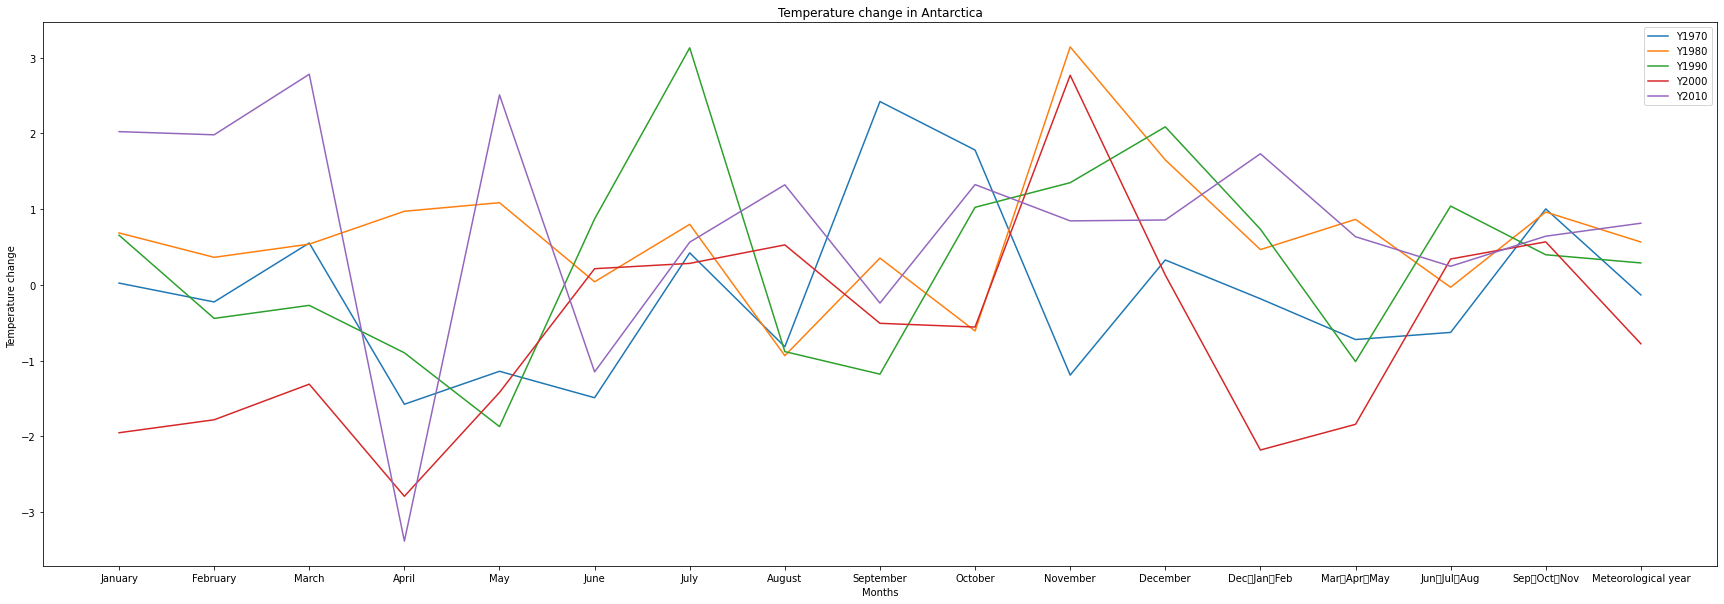

In [88]:
gb = df.groupby("Country")

#create a new dataframe
Antarctica_df = gb.get_group("Antarctica")
Antarctica_df.replace(0,np.NaN).dropna(axis=1)

Antarctica_df.head()

plt.figure(figsize =(30,10))
plt.subplot(111)
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y1970.loc[Antarctica_df.Element=='Temperature change'],label = "Y1970")
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y1980.loc[Antarctica_df.Element=='Temperature change'],label = "Y1980")
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y1990.loc[Antarctica_df.Element=='Temperature change'],label = "Y1990")
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y2000.loc[Antarctica_df.Element=='Temperature change'],label = "Y2000")
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y2010.loc[Antarctica_df.Element=='Temperature change'],label = "Y2010")
plt.xlabel("Months")
plt.ylabel("Temperature change ")
plt.title('Temperature change in Antarctica')
plt.show()

Inorder to work with a simpler manipulation, all the years are moved into a single column. Although we have more rows now, it barely affects the memory usage.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2006 non-null   object 
 1   Months              2006 non-null   object 
 2   Element             2006 non-null   object 
 3   Year                2006 non-null   object 
 4   temperature_change  2006 non-null   float64
dtypes: float64(1), object(4)
memory usage: 78.5+ KB
None


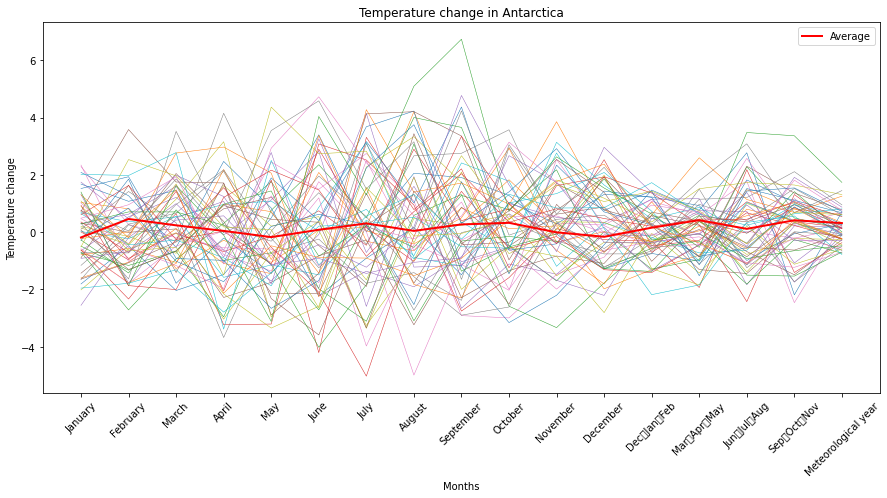

In [89]:
Antarctica_df = Antarctica_df.melt(id_vars = ['Country','Months','Element'],var_name = 'Year',value_name ='temperature_change')
Antarctica_df['Year'] = Antarctica_df['Year'].str[1:].astype('str')
print(Antarctica_df.info())

plt.figure(figsize= (15,15))
plt.subplot(211)
for i in Antarctica_df.Year.unique():
	plt.plot(Antarctica_df.Months.loc[Antarctica_df.Year==str(i)].loc[Antarctica_df.Element=='Temperature change'],Antarctica_df.temperature_change.loc[Antarctica_df.Year ==str(i)].loc[Antarctica_df.Element=='Temperature change'],linewidth = 0.5)
plt.plot(Antarctica_df.Months.unique(),Antarctica_df.loc[Antarctica_df.Element=='Temperature change'].groupby(['Months']).mean(),'r',linewidth=2.0,label = 'Average')
plt.xlabel('Months')
plt.xticks(rotation = 45)
plt.ylabel('Temperature change')
plt.title('Temperature change in Antarctica')
plt.legend()


Above plot shows temperature change over the year and the standard deviation for each month.

Summer 2010 in Southern Hemisphere began on Wednesday, 22 December. Least deviation occurs in the following months. The winter months show a larger spread with July being the highest. Standard Deviation is calculated by looking through the temperature of every month  in Antarctica for each year. 

Naturally each country will have a unique Standard Deviation. 


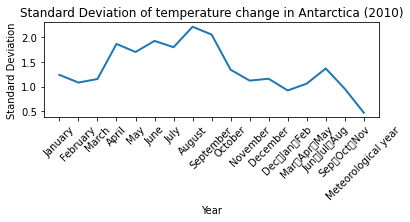

In [90]:
plt.subplot(212)
plt.plot(Antarctica_df.Months.loc[Antarctica_df.Year == '2010'].loc[Antarctica_df.Element=='Standard Deviation'],Antarctica_df.temperature_change.loc[Antarctica_df.Year=='2010'].loc[Antarctica_df.Element =='Standard Deviation'],linewidth=2.0)
plt.xlabel('Year')
plt.xticks(rotation = 45) 
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of temperature change in Antarctica (2010)')
plt.subplots_adjust(hspace = 0.3)

Next, we plot a scatterd view to see the data spread as well as the change in mean temperature.

Text(0.5, 1.0, 'Temperature change in Antarctica')

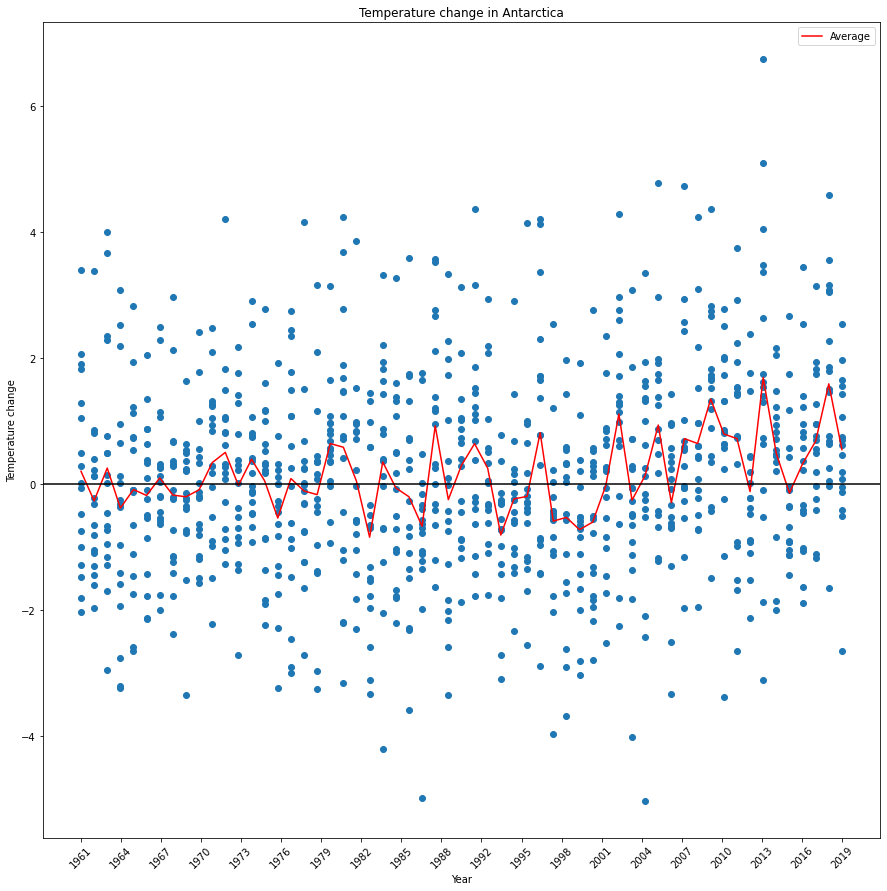

In [91]:
plt.figure(figsize = (15,15))
plt.scatter(Antarctica_df['Year'].loc[Antarctica_df.Element =='Temperature change'],Antarctica_df['temperature_change'].loc[Antarctica_df.Element=='Temperature change'])
plt.plot(Antarctica_df.loc[Antarctica_df.Element == 'Temperature change'].groupby(['Year']).mean(),'r',label = "Average")
plt.axhline(y=0.0,color = 'k',linestyle = '-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20),rotation=45)
plt.ylabel('Temperature change')
plt.legend()
plt.title('Temperature change in Antarctica')


A clearer relationship between the mean temperature and temperature changes can be achieved with a histogram.

Text(0.5, 1.0, 'Temperature change in Antarctica')

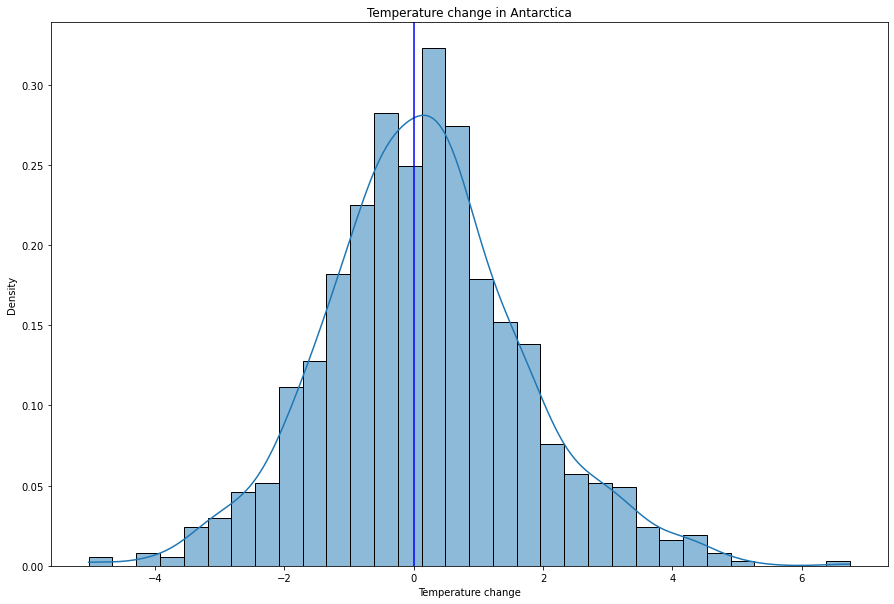

In [92]:
plt.figure(figsize = (15,10))
sns.histplot(Antarctica_df.temperature_change.loc[Antarctica_df.Element=='Temperature change'],kde = True,stat = 'density')
plt.axvline(x=0.0,color='b',linestyle = '-')
plt.xlabel('Temperature change')
plt.title('Temperature change in Antarctica')

Antarctica shows higher numbers than the world baseline, as average temperature change also increases every year.

# Global Temperature change

When we move onto every other country in the dataset, we need to avoid skewage of calculations. 

Thus we drop any country groupings present. Another column consisting of the year and the corresponding change in temperature is added. If needed later, we make a new dataset containing just the regions.

In [12]:
regions=temperature_change[temperature_change.Country.isin(['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD'])]

temperature_change = temperature_change[~temperature_change.Country.isin(['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD'])]

temperature_change.head()

,Country,Months,Element,Year,temperature_change
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516


Distribution data is now ready to be plot. The histogram below shows a similar temperature distribution plot as Antarctica. 

(-5.0, 5.0)

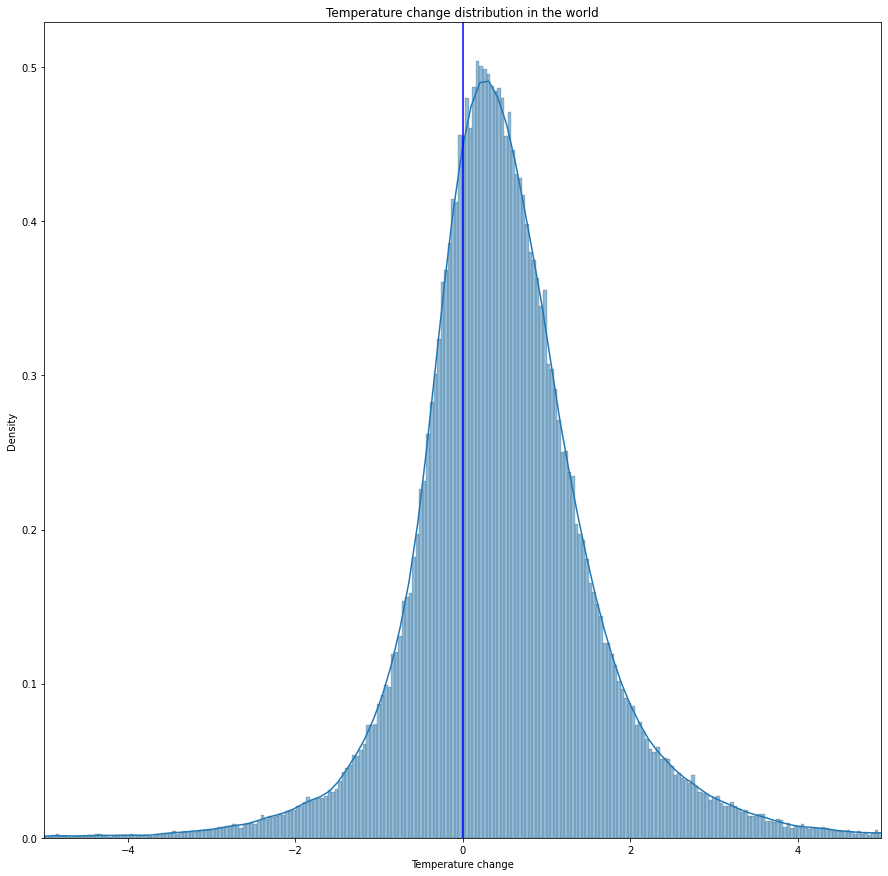

In [13]:
plt.figure(figsize = (15,15))
sns.histplot(temperature_change.temperature_change.loc[temperature_change.Element =='Temperature change'],kde = True,stat = 'density')
plt.axvline(x = 0.0,color = 'b',linestyle = '-')
plt.xlabel("Temperature change")
plt.title('Temperature change distribution in the world')
plt.xlim(-5,5)

We calculate the average global change in temperature and move it under a new dataframe. Similar operation is performed for each country.

A scatter plot can be prepared with these dataframes showing temperature change for all the countries over years and the world average. 

Text(0.5, 1.0, 'Temperature change across the world')

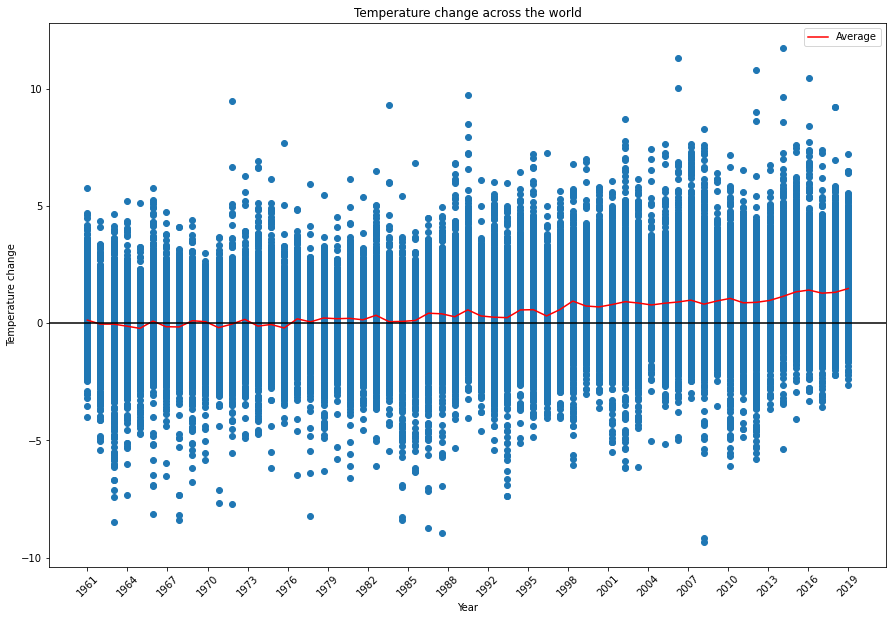

In [14]:
#Global average
average_temp = temperature_change.loc[temperature_change.Element == 'Temperature change'].groupby(['Year'],as_index = False).mean()
#Average by country
avg_temp_country = temperature_change.loc[temperature_change.Element=='Temperature change'].groupby(['Country','Year'],as_index = False).mean()


plt.figure(figsize=(15,10))
plt.scatter(temperature_change["Year"].loc[temperature_change.Element=='Temperature change'],temperature_change['temperature_change'].loc[temperature_change.Element=='Temperature change'])
plt.plot(average_temp.Year,average_temp.temperature_change,'r',label = 'Average')
plt.axhline(y=0.0,color = 'k',linestyle = '-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20),rotation =45)
plt.ylabel('Temperature change')
plt.legend()
plt.title('Temperature change across the world')



The world average can also be cast on top of temperatures of each country

Text(0.5, 1.0, 'Average temperature change of the world')

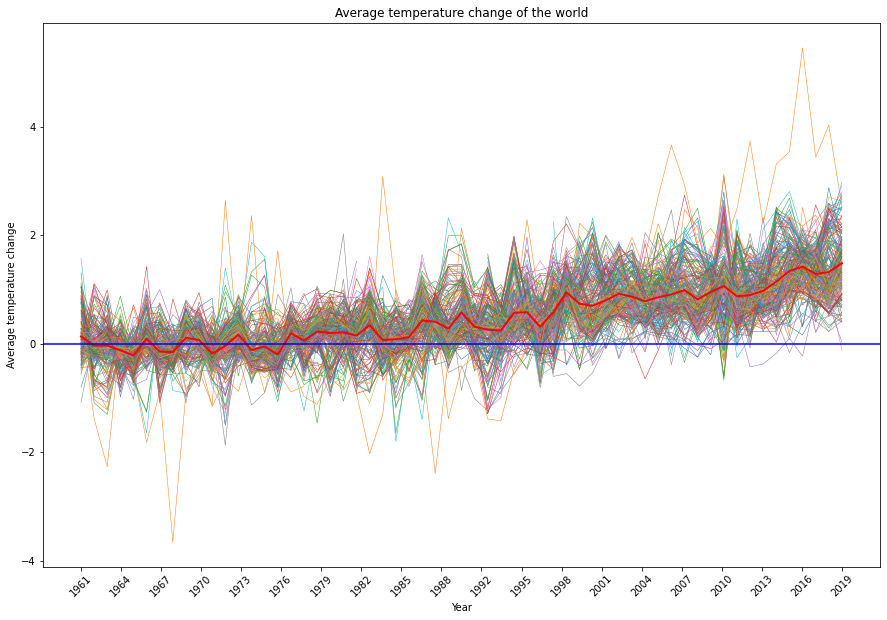

In [15]:

plt.figure(figsize = (15,10))
for i in avg_temp_country.Country.unique():
	plt.plot(avg_temp_country.Year.loc[avg_temp_country.Country == str(i)],avg_temp_country.temperature_change.loc[avg_temp_country.Country == str(i)],linewidth = 0.5 )
plt.plot(average_temp.Year,average_temp.temperature_change,'r',linewidth = 2.0)
plt.axhline(y = 0.0,color = 'b',linestyle ='-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20),rotation =45)
plt.ylabel('temperature change')
plt.title('Average temperature change of the world')

Our graph shows that an upward trend in global temperatures began around 1976-1978. As the global mean moves away from the baseline, so do the temperatures in individual countries. 
In the next part we use Linear and Polynomial regression to predict temperature change in the future.

First we replace the months' names with integers then get rid of a TypeError in Austria's dataframe.

In [37]:
Month_v = {'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7','August':'8', 'September':'9', 'October':'10', 'November':'11', 'December':'12'}
temperature_change = temperature_change.replace(Month_v)

#Data in Austria 
Austria_df = gb.get_group('Austria')
Austria_df = Austria_df.melt(id_vars = ['Country','Months','Element'],var_name = 'Year',value_name ='temperature_change')
Austria_df['Year'] = Austria_df['Year'].str[1:].astype(np.float64)

## Test-Train split

We split the data into traditional test and train datasets to verify our model's predictability.

In [38]:
#df.drop(Austria_df.index,axis=0)
y= temperature_change['temperature_change'].loc[temperature_change.Element=='Temperature change']

X = temperature_change.drop(columns =['temperature_change','Country','Months','Element']).loc[temperature_change.Element=="Temperature change"]

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,random_state=42)



## Regression

The simplest of models to attain our objective. We ue both linear and polynomial regression build our prediction models.

RMSE: 0.9721743424324878


Text(0, 0.5, '                     Actual Value -              Predicted value')

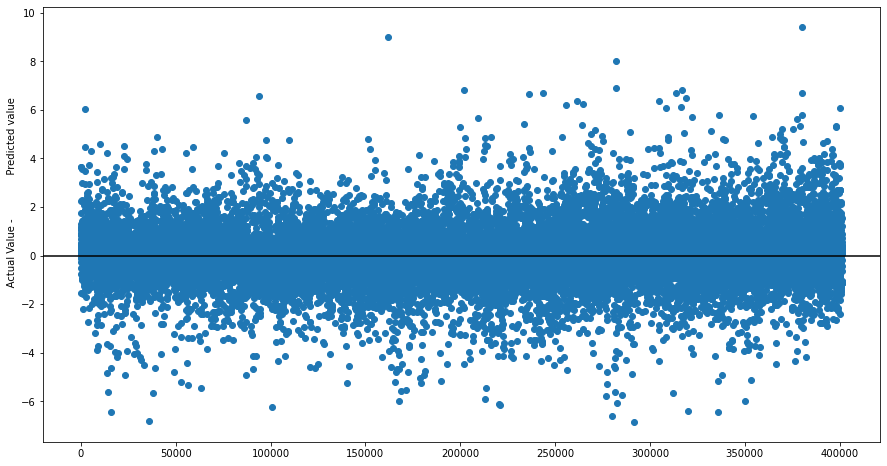

In [60]:
#Simple Linear Regression
LR = LinearRegression()
LR.fit(X_train,y_train)
LRpreds = LR.predict(X_valid)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, LRpreds)))
plt.figure(figsize = (15,8))
plt.plot(y_valid-LRpreds,'o')
plt.axhline(y=0.0,color='k',linestyle = '-' )
plt.ylabel('                     Actual Value -              Predicted value')

Root Mean Squared Error (RMSE) is measure of how far from the regression line our predicted data points lie. A high concentration of these around the baseline is indicates of a good fit.

We can now use the entire dataset to train the model.

In [73]:
#Fit the model into the training data
LR.fit(X,y)
#Creating Prediction Data
LR_test = pd.DataFrame({'Year':np.random.randint(1980,2060,size =100)})
LR.test = LR_test.sort_values(by=['Year']).reset_index(drop = True).astype(str)
#Generate Predictions
preds_test = LR.predict(LR_test)
LR_test['temperature_change'] = pd.Series(preds_test,index = LR_test.index)
#plt.plot(LR_test.Year.unique(),LR_test.groupby('Year').mean(),'b',linewidth = 2.0,label = 'Linear Model')

## Polynomial Regression

Differents plots have suggested that our data is barely linear, so we experiment with some nonlinear features to see if we can get a more accurate prediction.

In [71]:
#Generate Prediction Data
PR2_mod = Pipeline([('poly',PolynomialFeatures(degree=2)),('linear',LinearRegression(fit_intercept = False))])
PR3_mod = Pipeline([('poly',PolynomialFeatures(degree=5)),('linear',LinearRegression(fit_intercept = False))])

#Fit model to training data

PR2_mod.fit(X,y)
PR3_mod.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression(fit_intercept=False))])

In [76]:
#Generate test predictions

PR2_test = pd.DataFrame({'Year':np.random.randint(1980,2060,size =1000)})
PR2_test = PR2_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)

PR3_test = pd.DataFrame({'Year':np.random.randint(1980,2060,size = 1000)})
PR3_test = PR3_test.sort_values(by = ['Year']).reset_index(drop = True).astype(str)

pred2_test = PR2_mod.predict(PR2_test)
pred3_test = PR3_mod.predict(PR3_test)

In [77]:
PR2_test['temperature_change'] = pd.Series(pred2_test,index = PR2_test.index)

PR3_test['temperature_change'] = pd.Series(pred3_test,index = PR2_test.index)


### Plotting results

We can now plot the results from our polynomial models side-by-side and see how they take shape


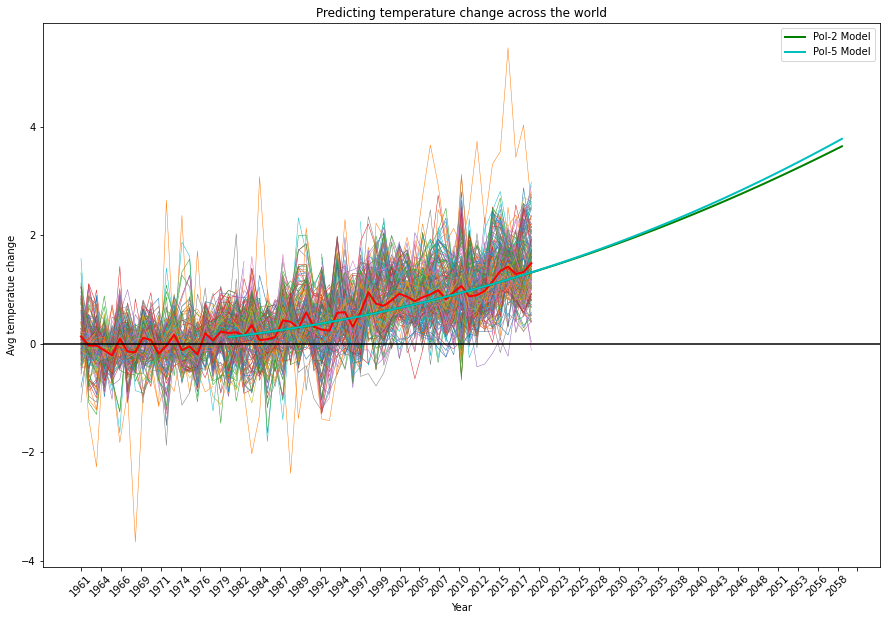

In [79]:
plt.figure(figsize = (15,10))
for i in avg_temp_country.Country.unique():
	plt.plot(avg_temp_country.Year.loc[avg_temp_country.Country == str(i)],avg_temp_country.temperature_change.loc[avg_temp_country.Country==str(i)],linewidth = 0.5)
plt.plot(average_temp.Year,average_temp.temperature_change,'r',linewidth = 2.0)
#plt.plot(LR_test.Year.unique(),LR_test.groupby('Year').mean(),'b',linewidth = 2.0,label = 'Linear Model')
plt.plot(PR2_test.Year.unique(),PR2_test.groupby('Year').mean(),'g',linewidth=2.0,label = 'Pol-2 Model')
plt.plot(PR3_test.Year.unique(),PR3_test.groupby('Year').mean(),'c',linewidth=2.0,label = 'Pol-5 Model')
plt.axhline(y=0.0,color = 'k',linestyle = '-')

plt.xticks(np.linspace(0,100,40),rotation=45)
plt.xlabel('Year')
plt.ylabel('Avg temperatue change')
plt.title('Predicting temperature change across the world')
plt.legend()
plt.show()


Above two curves depict the predicted temperatures for each year. They are cast onto the moving global average as well as indiviual country's temperature change over the years. As the curves stay well within the calculated mean when predicting in available years, we don't see much deviation. Everything afterwards shows the trend that global climate will show if no curbs are applied to this growth.